---
# 프로젝트 명: MLB 데이터를 활용한 회귀모델 생성 및 결과분석

## 데이터 출처: [Moneyball | Kaggle](https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012)

## 프로젝트 목표
    MLB Moneyball 데이터와 강의 실습시간에 배운 내용으로 회귀분석 및 로지스틱회귀분석 모델 생성
        - 한 시즌 동안 승리한 횟수(W) 예측 회귀분석 모델, 플레이오프 진출 여부(Playoffs) 결정 로지스틱회귀분석 모델 생성
    독립변수들과 종속변수와의 인과관계를 고려하여 모델에 영향력이 큰 유의미한 독립변수 찾기
        - 기존의 독립변수를 조합하여 만든 변수로 예측해보기
        - 변수선택법(전진선택법, 후진소거법)으로 최적의 변수 조합 찾기
        - 다중공선성 문제 확인
    회귀모델의 결과를 해석하는 방법 습득

## 프로젝트 구성
    - 시각화를 통한 데이터의 이해
    - RS를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
    - (RS-RA)를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
    - 회귀분석 결과의 해석
    - 모든 변수를 활용한 다중회귀분석 및 다중공선성 문제
    - 로지스틱회귀 모델 생성
    - 변수 선택법으로 로지스틱회귀분석 정확도 올리기

## 프로젝트 과정
    - 데이터의 간단한 시각화에서부터 회귀분석과 로지스틱회귀분석 문제 해결까지 강의 실습 내용 확인
    - 모델 생성 및 해석에 대한 내용에 집중하기 위해서 학습데이터와 테스트데이터를 구분하지 않고 진행
    - 강의 실습 시간에 다룬 자료를 이용해서 코드 작성

- 작성자: 김민중 감수자

---

### Context

In the early 2000s, Billy Beane and Paul DePodesta worked for the Oakland Athletics. While there, they literally changed the game of baseball. They didn't do it using a bat or glove, and they certainly didn't do it by throwing money at the issue; in fact, money was the issue. They didn't have enough of it, but they were still expected to keep up with teams that had much deeper pockets. This is where Statistics came riding down the hillside on a white horse to save the day. This data set contains some of the information that was available to Beane and DePodesta in the early 2000s, and it can be used to better understand their methods.

### Content

This data set contains a set of variables that Beane and DePodesta focused heavily on. They determined that stats like on-base percentage (OBP) and slugging percentage (SLG) were very important when it came to scoring runs, however they were largely undervalued by most scouts at the time. This translated to a gold mine for Beane and DePodesta. Since these players weren't being looked at by other teams, they could recruit these players on a small budget. The variables are as follows:

- Team, 팀
- League, 리그
- Year, 연도
- Runs Scored (RS), 득점 수
- Runs Allowed (RA), 실점 수
- Wins (W), 승리 횟수
- On-Base Percentage (OBP), 출루율
- Slugging Percentage (SLG), 장타율
- Batting Average (BA), 타율
- Playoffs (binary), 플레이오프 진출 여부
- RankSeason, 시즌 순위
- RankPlayoffs 플레이오프 순위
- Games Played (G), 경기 수
- Opponent On-Base Percentage (OOBP), 도루 허용률
- Opponent Slugging Percentage (OSLG), 피장타율

### [Baseball statistics](https://en.wikipedia.org/wiki/Baseball_statistics)을 살펴보면 각 변수의 정확한 의미를 파악할 수 있다.

# 아래 코드를 실행해주세요.

In [1]:
# 참고: 프로젝트 출제자의 Python 및 주요 라이브러리 버전

import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sys
import seaborn as sns

print("python version: ", sys.version)
print("pandas version: ", pd.__version__)
print("statsmodels version: ", sm.__version__)
print("numpy version: ", np.__version__)

%matplotlib inline

python version:  3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
pandas version:  1.0.5
statsmodels version:  0.11.1
numpy version:  1.18.5


In [2]:
# Kaggle의 정책상 프로젝트 참여자는 Kaggle에 직접 로그인해서 자료를 다운로드하는 것을 권합니다.
# moneyball = pd.read_csv("https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/baseball.csv", encoding="utf8")

# 데이터 불러오기(자료는 data 폴더에 있음)
moneyball = pd.read_csv(r"C:\Users\home\WorkSpace\바이트디그리_머신러닝\baseball.csv", encoding="utf8")
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# 데이터의 간단한 정보 파악(na의 개수 및 데이터 타입)
moneyball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [5]:
moneyball.shape

(1232, 15)

In [6]:
moneyball.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [7]:
# na가 있는 컬럼인 RankSeason, RankPlayoffs, OOBP, OSLG을 제거(프로젝트에서 사용 안 함)
moneyball = moneyball.dropna(axis=1)
moneyball.info()

# 1232개의 object와 11개의 변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      1232 non-null   object 
 1   League    1232 non-null   object 
 2   Year      1232 non-null   int64  
 3   RS        1232 non-null   int64  
 4   RA        1232 non-null   int64  
 5   W         1232 non-null   int64  
 6   OBP       1232 non-null   float64
 7   SLG       1232 non-null   float64
 8   BA        1232 non-null   float64
 9   Playoffs  1232 non-null   int64  
 10  G         1232 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 106.0+ KB


In [8]:
moneyball.isnull().sum()

Team        0
League      0
Year        0
RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
G           0
dtype: int64

In [9]:
moneyball.shape

(1232, 11)

In [10]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,162
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,162


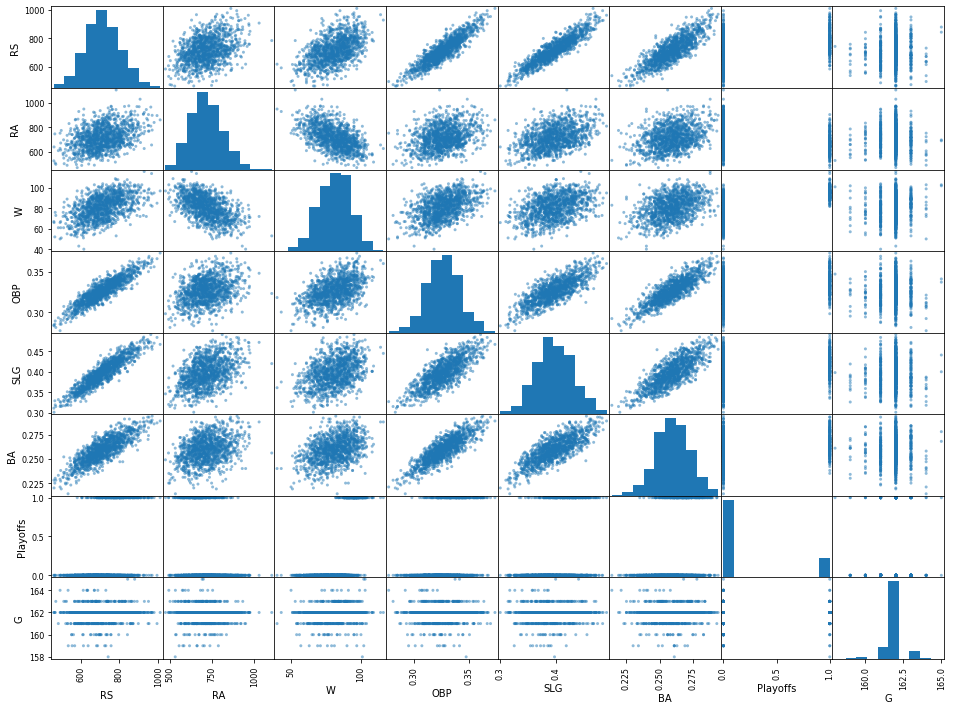

In [11]:
# Object 변수 및 불필요한 변수 제거해서 단순 시각화 
# 11개 컬럼중 2개의 오브젝트(Team,League)컬럼 제거 및 year 컬럼 불필요하니 제거. 

selected_df = moneyball.select_dtypes(exclude=['object'])
selected_df = selected_df.drop(["Year"], axis=1)
_ = pd.plotting.scatter_matrix(selected_df,
                               alpha = 0.5, figsize=(16,12))

# 컬럼뜻

- Runs Scored (RS), 득점 수
- Runs Allowed (RA), 실점 수
- Wins (W), 승리 횟수
- On-Base Percentage (OBP), 출루율
- Slugging Percentage (SLG), 장타율
- Batting Average (BA), 타율
- Playoffs (binary), 플레이오프 진출 여부
- Games Played (G), 경기 수

## STEP 1. 시각화를 통한 데이터의 이해 
- 다양한 수치값을 갖는 변수들의 산포도를 보고 받은 통찰(insight)은 무엇인가?
- 상관관계를 보이는 데이터들은 존재하는가? 있다면 어떤 변수들이 어떤 관계에 있는지 대답하시오.
- 경기 수(G)의 히스토그램은 어떤 의미를 갖는가? 또한 다른 변수들의 히스토그램을 보고 해석하시오.

### 상관관계 
변수 (column)사이의 상관계수(correlation) corr함수를 통해 상관계수 연산(-1, 1 사이의 결과)

1에 가까울수록 양의 상관관계가 강하다 (= 하나가 증가하면 다른 하나도 증가)

-1에 가까울수록 음의 상관관계가 강하다 (= 하나가 증가하면 다른 하나는 감소)

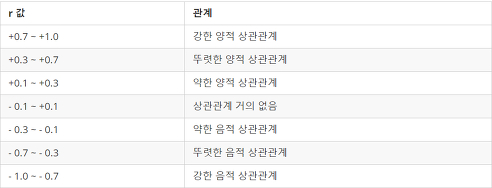

### [풀이] 
- 실점수를 제외한 나머지 득점수,승리횟수, 출루율, 장타율, 타율은 승리에 관련되어있다. 경기수가 많다고 플레이오프 진출하는것도 아니며
- 각 경기에 따른 득점수,승리횟수, 출루율, 장타율, 타율, 실점수는 평균치를 가지고 있다. 
- playoff와 경기수를 제외한 나머지는 거의 양의 상관관계를 가지고 있고 승리횟수와 실점수는 음의 상관관계를 가지고 있다. 
- playoff와 경기수는 상관관계가 거의 없다. 


In [12]:
selected_df.corr()

,RS,RA,W,OBP,SLG,BA,Playoffs,G
RS,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,0.075195
RA,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,-0.023369
W,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,0.105309
OBP,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.016563
SLG,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.036770
BA,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.019886
Playoffs,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,0.022208
G,0.075195,-0.023369,0.105309,0.016563,0.036770,0.019886,0.022208,1.000000


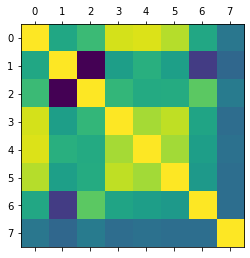

In [13]:
plt.matshow(selected_df.corr())

## STEP 2. RS를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
- 가정: 시즌 총 득점(RS)이 승리에 영향을 줄 것이다.
- RS를 독립변수로 W를 예측한 단순선형모델 직선의 기울기 $\alpha$와 절편 $\beta$는 몇인가?

$$
W = \alpha RS + \beta
$$


- 해당 모델이 얼마나 적합한지를 평가하는 $R^2$는 몇 인가?
- 적당한 모델이라고 할 수 있는가?

### [풀이] 
- 직선의 기울기 = 0.0641	절편 = 35.0964
- R-squared : 0.262
- 적당하지 않다.

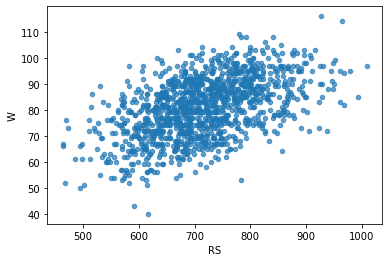

In [14]:
moneyball.plot.scatter(x = "RS", y = "W", alpha = 0.7)

In [15]:
RS = selected_df[['RS']]
W = selected_df[['W']]

In [16]:
RS1 = sm.add_constant(RS,has_constant= 'add')

In [17]:
RS1.max()

const       1.0
RS       1009.0
dtype: float64

In [18]:
# sm으로 fit한 모델명은 fit_simple_model 으로 하시오.
model = sm.OLS(W,RS1)
fit_simple_model = model.fit()

In [19]:
fit_simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     436.4
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           3.50e-83
Time:                        22:02:40   Log-Likelihood:                -4565.1
No. Observations:                1232   AIC:                             9134.
Df Residuals:                    1230   BIC:                             9144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0964      2.211     15.876      0.000      30.759      39.434
RS             0.0641      0.003     20.890      0.000       0.058       0.070
==============================================================================
Omnibus:                       14.041   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.799
Skew:                          -0.134   Prob(JB):                      0.00452
Kurtosis:                       2.627   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Linear Regression')

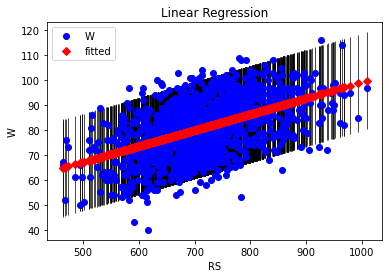

In [20]:
# 참고
# Fit된 직선 그리기. sm을 이용해서 선형회귀분석을 한 경우 
# 아래와 같이 간단한 코드로 적합된 직선과 원래 데이터의 그림을 그릴 수 있음.

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit_simple_model, 1, ax=ax)
ax.set_ylabel("W")
ax.set_xlabel("RS")
ax.set_title("Linear Regression")

In [21]:
fit_simple_model.params

const    35.096418
RS        0.064060
dtype: float64

### Comments
- 득점 RS로 W를 예측한 단순선형회귀분석의 적합도는 만족하기 어려움(R squared 값으로 판단).
- 시즌 총 실점 RA를 독립변수로 W를 예측하는 단순선형회귀분석의 결과는 어떠한가? 만족할 만한가? 
- RS를 RA로 변경해서 기울기와 절편 및 R squared를 구해보시오. 

### [풀이] 
- 직선의 기울기 = -0.0655		절편 = 127.7690
- R-squared : 0.283
- 적당하지 않다.

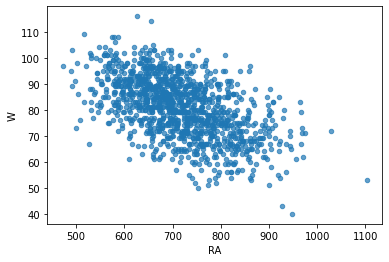

In [22]:
moneyball.plot.scatter(x = "RA", y = "W", alpha = 0.7)

In [23]:
RA = selected_df[['RA']]

In [24]:
RA1 = sm.add_constant(RA,has_constant= 'add')

In [25]:
RA1.max()

const       1.0
RA       1103.0
dtype: float64

In [26]:
model1 = sm.OLS(W,RA1)
fit_simple_model1 = model1.fit()

In [27]:
fit_simple_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     486.5
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           4.06e-91
Time:                        22:02:40   Log-Likelihood:                -4546.8
No. Observations:                1232   AIC:                             9098.
Df Residuals:                    1230   BIC:                             9108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.7690      2.143     59.634      0.000     123.566     131.973
RA            -0.0655      0.003    -22.058      0.000      -0.071      -0.060
==============================================================================
Omnibus:                        5.903   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.615
Skew:                          -0.127   Prob(JB):                       0.0604
Kurtosis:                       2.789   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Linear Regression')

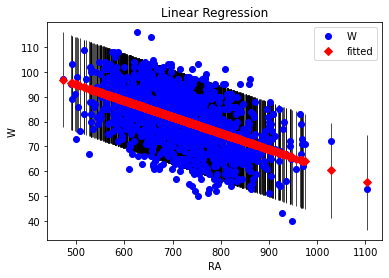

In [28]:
# 참고
# Fit된 직선 그리기. sm을 이용해서 선형회귀분석을 한 경우 
# 아래와 같이 간단한 코드로 적합된 직선과 원래 데이터의 그림을 그릴 수 있음.

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit_simple_model1, 1, ax=ax)
ax.set_ylabel("W")
ax.set_xlabel("RA")
ax.set_title("Linear Regression")

### [풀이] 
- 

## STEP 3. (RS-RA)를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
- 득점과 실점이 승리 수와 관련이 없을까? 경기에서 승리하려면 상대보다 득점을 많이 해야한다. 즉, (득점 - 실점)을 새로운 독립변수로 설정하고 W를 예측하는 단순선형회귀분석을 해보시오.
- 가정: 시즌 총 득점(RS)과 실점(RA)의 차이가 승리에 영향을 줄 것이다.
- 강의 실습 시간에 학습한 statsmodels 라이브러리를 이용해서 아래의 질문에 답하시오.
- (RS-RA)를 독립변수로 W를 예측한 단순선형모델의 기울기 $\alpha$와 절편 $\beta$는 몇인가?

$$
W = \alpha \cdot (RS-RA) + \beta
$$

- 해당 모델이 얼마나 적합한지를 평가하는 $R^2$는 몇 인가?
- 적당한 모델이라고 할 수 있는가?

### [풀이] 
- 직선의 기울기 = 0.1045		절편 = 80.9042
- R-squared : 0.880
- 적당한 모델이다.

In [29]:
moneyball['RS - RA'] = moneyball['RS'] - moneyball['RA']

In [30]:
RSMRA = moneyball[['RS - RA']]

In [31]:
RSMRA

,RS - RA
0,46
1,100
2,7
3,-72
4,-146
...,...
1227,-54
1228,80
1229,188
1230,110


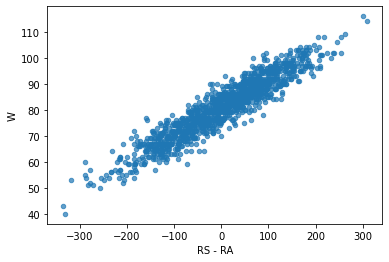

In [32]:
moneyball.plot.scatter(x = "RS - RA", y = "W", alpha = 0.7)

In [33]:
RSMRA = moneyball[['RS - RA']]

In [34]:
RSMRA1 = sm.add_constant(RSMRA,has_constant= 'add')

In [35]:
model2 = sm.OLS(W,RSMRA1)
fit_simple_model2 = model2.fit()

In [36]:
fit_simple_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     8983.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:02:41   Log-Likelihood:                -3448.3
No. Observations:                1232   AIC:                             6901.
Df Residuals:                    1230   BIC:                             6911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9042      0.113    713.853      0.000      80.682      81.127
RS - RA        0.1045      0.001     94.778      0.000       0.102       0.107
==============================================================================
Omnibus:                        0.797   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.686
Skew:                          -0.041   Prob(JB):                        0.710
Kurtosis:                       3.081   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Linear Regression')

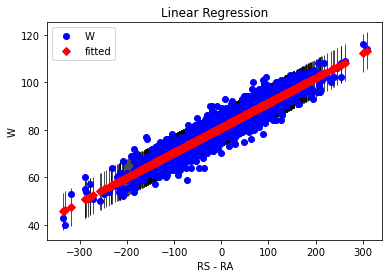

In [37]:
# 참고
# Fit된 직선 그리기. sm을 이용해서 선형회귀분석을 한 경우 
# 아래와 같이 간단한 코드로 적합된 직선과 원래 데이터의 그림을 그릴 수 있음.

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit_simple_model2, 1, ax=ax)
ax.set_ylabel("W")
ax.set_xlabel("RS - RA")
ax.set_title("Linear Regression")

## STEP 4. 회귀분석 결과의 해석
- 득점과 실점이 개별적으로 한 개씩만 본다면 승리 예측에 큰 영향을 주지 못하지만 (득점 - 실점)으로 결합한 변수는 승리 예측에 유의미하게 영향을 주었다. 이런 작용은 무엇이라고 하는가?
- 다시 RS, RA를 두 개의 독립변수로 W를 예측한 선형모델의 기울기 $\alpha_1$, $\alpha_2$와 절편 $\beta$는 몇인가?

$$
W = \alpha_1 RS + \alpha_2 RA + \beta
$$

- RS, RA를 두 개의 독립변수로 W를 예측한 모델과 (RS-RA)을 독립변수로 W를 예측한 모델은 무슨 차이가 있을까?
- 회귀분석 결과인 $\alpha_1$, $\alpha_2$와 (RS-RA)의 계수인 $\alpha$를 비교해보고 RS와 RA의 차이가 승리에 큰 영향을 미친다고 결론 내릴 수 있는가?

### [풀이] 
- 교호작용 이라고 한다.
- a1의 기울기 = 0.1045, a2의 기울기 = -0.1046 절편 = 80.9805
- 큰 차이가 없는것 같다. 
- 승리에 큰 영향을 미칠것 같다. 

In [38]:
RSRA = moneyball[['RS', 'RA']]

In [39]:
RSRA

,RS,RA
0,734,688
1,700,600
2,712,705
3,734,806
4,613,759
...,...,...
1227,705,759
1228,706,626
1229,878,690
1230,774,664


In [40]:
RSRA1 = sm.add_constant(RSRA,has_constant= "add")

In [41]:
RSRA1

,const,RS,RA
0,1.0,734,688
1,1.0,700,600
2,1.0,712,705
3,1.0,734,806
4,1.0,613,759
...,...,...,...
1227,1.0,705,759
1228,1.0,706,626
1229,1.0,878,690
1230,1.0,774,664


In [42]:
multi_model = sm.OLS(W, RSRA1)
fitted_multi_model = multi_model.fit()

In [43]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     4488.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:02:41   Log-Likelihood:                -3448.3
No. Observations:                1232   AIC:                             6903.
Df Residuals:                    1229   BIC:                             6918.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9805      1.064     76.111      0.000      78.893      83.068
RS             0.1045      0.001     77.995      0.000       0.102       0.107
RA            -0.1046      0.001    -79.393      0.000      -0.107      -0.102
==============================================================================
Omnibus:                        0.802   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.691
Skew:                          -0.041   Prob(JB):                        0.708
Kurtosis:                       3.081   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## STEP 5. 모든 변수를 활용한 다중회귀분석 및 다중공선성 문제
- [RS, RA, OBP, SLG, BA, G] 6개 독립변수로 W를 예측하는 다중회귀분석 하시오.
- RS, RA 두 독립변수의 모델과 비교했을 때 결과가 향상됐다고 할 수 있는가?
- 결과가 향상되지 않았다면 다중공선성 문제가 있을 수 있다고 판단할 수 있는데 정량적인 수치로 확인해보시오. VIF를 구하고 결과를 해석하시오(특별히 RS의 VIF 수치가 높게 나온 이유를 한번 생각해 보시오).
    - RS, RA 두 변수로도 충분히 W를 설명 가능했었습니다. 이를 어떻게 해석해야 할까요?
    - G의 VIF 수치는 어떻게 해석해야 할까요? 가장 낮은 VIF가 예측에 중요한 변수인가요?
- 주의 statsmodels에는 항상 상수항을 넣어주어야 한다. VIF도 마찬가지임. [참고](https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python)
- 강의 실습 때 다룬 전진선택법을 사용해서 AIC가 가장 작은 값이 나오는 독립변수를 찾으시오.

### [풀이] 
- R-squared:0.881이 나왔다.  결과가 향상되지 않은것 같아서 VIF를 구해보았다. 다중공선성 문제가 있는것 같다. 
- VIF가 가장 높은 RS는 승리와 많은 관련이 있을것이라고 예상했던 변수이다. 그리고 상관관계를 보았을때 승리와 관련이있는 양의 상관계수를 가지고 있었다.
- RS와 RA이 두가지의 변수가 가장 중요한 변수여서 그런것 같다. 
- G의 VIF수치는 매우 적고 다른 변수와의 관련이 적다. 그래서 예측에 중요한 변수가 아니다. 
-             Processed  2 models on 5 predictors in 0.003989458084106445 Selected predictors: ['RA', 'RS', 'G', 'SLG', 'OBP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper objectat 0x000001F4C5903BC8> 
- 전진선택법을 사용해 보았는데 위에 가져온 부분의 변수가  AIC가 가장 낮다.

In [44]:
full_data = moneyball[['RS', 'RA', 'OBP', 'SLG', 'BA', 'G']]

In [45]:
full_data

,RS,RA,OBP,SLG,BA,G
0,734,688,0.328,0.418,0.259,162
1,700,600,0.320,0.389,0.247,162
2,712,705,0.311,0.417,0.247,162
3,734,806,0.315,0.415,0.260,162
4,613,759,0.302,0.378,0.240,162
...,...,...,...,...,...,...
1227,705,759,0.330,0.390,0.260,161
1228,706,626,0.321,0.394,0.268,161
1229,878,690,0.341,0.441,0.278,165
1230,774,664,0.335,0.394,0.271,163


In [46]:
full_data1 = sm.add_constant(full_data,has_constant= "add")

In [47]:
full_data1

,const,RS,RA,OBP,SLG,BA,G
0,1.0,734,688,0.328,0.418,0.259,162
1,1.0,700,600,0.320,0.389,0.247,162
2,1.0,712,705,0.311,0.417,0.247,162
3,1.0,734,806,0.315,0.415,0.260,162
4,1.0,613,759,0.302,0.378,0.240,162
...,...,...,...,...,...,...,...
1227,1.0,705,759,0.330,0.390,0.260,161
1228,1.0,706,626,0.321,0.394,0.268,161
1229,1.0,878,690,0.341,0.441,0.278,165
1230,1.0,774,664,0.335,0.394,0.271,163


In [48]:
full_model = sm.OLS(W, full_data1)
fitted_full_model = full_model.fit()

In [49]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1514.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:02:41   Log-Likelihood:                -3440.1
No. Observations:                1232   AIC:                             6894.
Df Residuals:                    1225   BIC:                             6930.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.0766     30.741     -0.393      0.695     -72.388      48.235
RS             0.0912      0.005     19.957      0.000       0.082       0.100
RA            -0.1050      0.001    -77.700      0.000      -0.108      -0.102
OBP           58.5427     20.365      2.875      0.004      18.588      98.497
SLG           22.9386      9.409      2.438      0.015       4.480      41.397
BA           -27.0409     17.942     -1.507      0.132     -62.241       8.159
G              0.5040      0.184      2.742      0.006       0.143       0.865
==============================================================================
Omnibus:                        0.385   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.297
Skew:                          -0.025   Prob(JB):                        0.862
Kurtosis:                       3.057   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(full_data1.values, i) for i in range(full_data1.shape[1])]
vif["features"] = full_data1.columns


In [51]:
vif

,VIF Factor,features
0,74248.579971,const
1,13.745013,RS
2,1.241633,RA
3,7.338020,OBP
4,7.690644,SLG
5,4.209910,BA
6,1.033843,G


In [52]:
from sklearn.model_selection import train_test_split
import time

In [53]:
all_data1 = moneyball[['RS', 'RA', 'OBP', 'SLG', 'BA', 'G', 'W']]

In [54]:
all_data1 = sm.add_constant(all_data1,has_constant= "add")

In [55]:
all_data1

,const,RS,RA,OBP,SLG,BA,G,W
0,1.0,734,688,0.328,0.418,0.259,162,81
1,1.0,700,600,0.320,0.389,0.247,162,94
2,1.0,712,705,0.311,0.417,0.247,162,93
3,1.0,734,806,0.315,0.415,0.260,162,69
4,1.0,613,759,0.302,0.378,0.240,162,61
...,...,...,...,...,...,...,...,...
1227,1.0,705,759,0.330,0.390,0.260,161,81
1228,1.0,706,626,0.321,0.394,0.268,161,93
1229,1.0,878,690,0.341,0.441,0.278,165,103
1230,1.0,774,664,0.335,0.394,0.271,163,84


In [56]:
feature_columns = all_data1.columns.difference(['W'])
X = all_data1[feature_columns]
y = all_data1.W
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(862, 7) (370, 7) (862,) (370,)


In [57]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X.astype(float)[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F56ED6CB88>, 'AIC': 4787.576744026583}


In [58]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [59]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [60]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  6 models on 1 predictors in 0.011967897415161133
Selected predictors: ['RA', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F56ED8AF88>
Processed  5 models on 2 predictors in 0.006981611251831055
Selected predictors: ['RA', 'RS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F56ED740C8>
Processed  4 models on 3 predictors in 0.004986763000488281
Selected predictors: ['RA', 'RS', 'G', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F56ED9AA48>
Processed  3 models on 4 predictors in 0.003989696502685547
Selected predictors: ['RA', 'RS', 'G', 'OBP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F56ED9C608>
Processed  2 models on 5 predictors in 0.003988981246948242
Selected predictors: ['RA', 'RS', 'G', 'OBP', 'SLG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWra

In [61]:
Forward_best_model.aic

4782.19008970505

In [62]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1109.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:02:41   Log-Likelihood:                -2384.1
No. Observations:                 862   AIC:                             4782.
Df Residuals:                     855   BIC:                             4816.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RA            -0.1045      0.002    -65.966      0.000      -0.108      -0.101
RS             0.0856      0.005     15.807      0.000       0.075       0.096
G              0.5671      0.222      2.555      0.011       0.131       1.003
OBP           81.2212     23.528      3.452      0.001      35.043     127.400
SLG           33.4882     10.994      3.046      0.002      11.910      55.067
BA           -41.5941     20.855     -1.994      0.046     -82.527      -0.661
const        -26.4434     37.262     -0.710      0.478     -99.579      46.692
==============================================================================
Omnibus:                        1.002   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.859
Skew:                           0.054   Prob(JB):                        0.651
Kurtosis:                       3.111   Cond. No.                     2.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

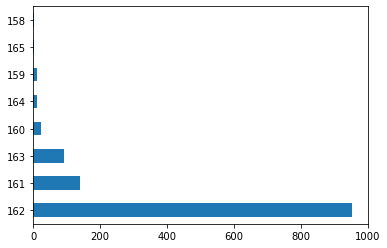

In [63]:
# 참고: 경기수 G 히스토그램
moneyball["G"].value_counts().plot.barh()
# 대부분 162 근처에 있음

In [64]:
# 참고로 선형회귀분석의 다양한 통계적인 결과 수치를 원치 않는 경우
# sklearn을 이용해서 손쉽게 회귀분석 모델을 만들 수 있다.

from sklearn.linear_model import LinearRegression

# Fit 할 때 상수항을 따로 추가할 필요 없음
reg = LinearRegression().fit(moneyball[["RS", "RA"]], moneyball["W"])
print("r squared:", reg.score(moneyball[["RS", "RA"]], moneyball["W"]))
print("coefficients: ", reg.coef_)
print("intercept: ", reg.intercept_)

r squared: 0.8795651418768365
coefficients:  [ 0.10449347 -0.10460008]
intercept:  80.98045555972713


## STEP 6. 로지스틱회귀 모델 생성
- RS와 RA 두 독립변수로 플레이오프(Playoffs) 진출 여부를 결정하는 로지스틱회귀분석 모델을 생성해보시오.
- Confusion matrix, AUC, ROC 곡선을 이용해서 결과를 해석해 보시오.
- 참고
    - [Scikit learn confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [Model Evaluation Techniques for Classification models](https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b)
    - [Evaluating a Classification Model]()

### [풀이] 
- 

In [111]:
RSRAP = moneyball[['RS', 'RA', 'Playoffs']]

In [114]:
RSRAP1 = sm.add_constant(RSRAP,has_constant= 'add')

In [115]:
RSRAP1

,const,RS,RA,Playoffs
0,1.0,734,688,0
1,1.0,700,600,1
2,1.0,712,705,1
3,1.0,734,806,0
4,1.0,613,759,0
...,...,...,...,...
1227,1.0,705,759,0
1228,1.0,706,626,0
1229,1.0,878,690,1
1230,1.0,774,664,0


In [117]:
feature_columns1 = RSRAP1.columns.difference(['Playoffs'])
X = RSRAP1[feature_columns1]
y = RSRAP1['Playoffs']

In [118]:
X

,RA,RS,const
0,688,734,1.0
1,600,700,1.0
2,705,712,1.0
3,806,734,1.0
4,759,613,1.0
...,...,...,...
1227,759,705,1.0
1228,626,706,1.0
1229,690,878,1.0
1230,664,774,1.0


In [119]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(862, 3) (370, 3) (862,) (370,)


In [140]:
## 로지스틱 모형 적합 

model = sm.Logit(train_y, train_x)
fit_logit = model.fit()

Optimization terminated successfully.
         Current function value: 0.249769
         Iterations 8


In [141]:
fit_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                  862
Model:                          Logit   Df Residuals:                      859
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Jul 2020   Pseudo R-squ.:                  0.4986
Time:                        22:38:25   Log-Likelihood:                -215.30
converged:                       True   LL-Null:                       -429.40
Covariance Type:            nonrobust   LLR p-value:                 1.044e-93
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RA            -0.0322      0.003    -11.275      0.000      -0.038      -0.027
RS             0.0342      0.003     11.969      0.000       0.029       0.040
const         -4.8082      1.232     -3.903      0.000      -7.223      -2.394
==============================================================================
"""

In [167]:
print("model AIC: ","{:.5f}".format(fit_logit.aic))

model AIC:  436.60231


In [142]:
fit_logit.params

RA      -0.032197
RS       0.034212
const   -4.808183
dtype: float64

In [143]:
np.exp(fit_logit.params)

RA       0.968316
RS       1.034804
const    0.008163
dtype: float64

In [146]:
## y_hat 예측
pred_y = fit_logit.predict(test_x)
pred_y

1074    0.096692
1034    0.000911
1152    0.184171
1226    0.777098
1060    0.222912
          ...   
376     0.000525
754     0.001485
898     0.000030
502     0.001075
451     0.971991
Length: 370, dtype: float64

In [147]:
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
pred_Y

1074    0
1034    0
1152    0
1226    1
1060    0
       ..
376     0
754     0
898     0
502     0
451     1
Length: 370, dtype: int32

In [148]:
from sklearn.metrics import confusion_matrix

In [149]:
# confusion matrix
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[283  14]
 [ 32  41]]


In [150]:
(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy

0.8756756756756757

In [151]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy
    return(acc)

In [152]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] =acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.197297
0.1,0.805405
0.2,0.851351
0.3,0.864865
0.4,0.889189
0.5,0.875676
0.6,0.862162
0.7,0.856757
0.8,0.845946


In [153]:
from sklearn import metrics

AUC: 0.9276786126101195


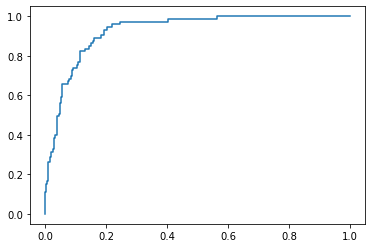

In [154]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)



In [134]:
# 참고로 선형회귀분석과 마찬가지로 sklearn을 이용해서 손쉽게 회귀분석 모델을 만들 수 있다.
# 위 결과와 비교해보시오.

from sklearn.linear_model import LogisticRegression

# Fit 할 때 상수항을 따로 추가할 필요 없음
reg = LogisticRegression().fit(moneyball[["RS", "RA"]], moneyball["Playoffs"])
print("mean accuracy:", reg.score(moneyball[["RS", "RA"]], moneyball["Playoffs"]))
print("coefficients: ", reg.coef_)
print("intercept: ", reg.intercept_)

mean accuracy: 0.885551948051948
coefficients:  [[ 0.03268497 -0.02999918]]
intercept:  [-5.09819896]


### Comments
- 로지스틱회귀분석은 주어진 독립변수의 공간을 선형으로 분리한다고 수학적으로 해석할 수 있다. 조금 더 자세히 설명하면 로지스틱회귀분석의 결과로 우리는 아래 식의 계수들 $\alpha_1, \alpha_2, \beta$를 얻었다. 플레이오프의 진출 여부를 0 ~ 1사이의 확률 값으로 출력하는 식이 로지스틱회귀분석의 결과이다. 여기서 진출 여부의 판단 기준을 $1/2$로 한다고 가정해보자(일반적으로 $1/2$ 확률로 판단하지만 모델이나 상황에 따라서 조절할 수도 있다).

$$
\text{Playoffs} = \frac{1}{1 + e^{(\alpha_1 RS + \alpha_2 RA + \beta)}}
$$

- 왼쪽 플레이오프 진출 확률을 1/2로 두고 식을 정리하면 다음과 같다.

$$
\alpha_1 RS + \alpha_2 RA + \beta = 0
$$

- 결과적으로 위 식을 만족하는 RS와 RA 값들은 아래와 같은 빨간색 선과 같은 직선의 형태를 띤다. 직선(선형)을 기준으로 한쪽 영역은 플레이오프 진출 못함, 반대쪽은 플레이오프 진출함으로 판단되는 것이다(물론 로지스틱회귀분석모델의 판단). 

![](https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/logistic.png)


- 이처럼 로지스틱회귀분석은 주어진 독립변수 공간을 선형으로 분리해서 이진 분류하는 방식이기 때문에 XOR 문제를 해결하기 어려운 것이다(XOR은 선형으로 해결 불가능). 그림 출처: https://web.stanford.edu/~jurafsky/slp3/7.pdf

![](https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/xor.png)

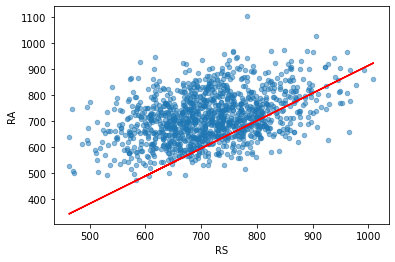

In [155]:
line_x = moneyball["RS"]

line_y = (- fit_logit.params["RS"] * moneyball["RS"]  - fit_logit.params["const"] ) \
          / fit_logit.params["RA"]

moneyball.plot.scatter(x = "RS", y = "RA", alpha = 0.5)
plt.plot(line_x, line_y, "r")

## STEP 7. 변수 선택법으로 로지스틱회귀분석 정확도 올리기
- RS, RA, OBP, SLG, BA, G을 독립변수를 사용해서(상수항 포함) 플레이오프 진출 여부를 결정하는 로지스틱회귀분석 모델을 만들어 보시오.
- 후진소거법으로 최적의 독립변수를 찾아 보시오(AIC 값이 크게).

### [풀이] 
- 

In [156]:
_all = moneyball[['RS', 'RA', 'OBP', 'SLG', 'BA', 'G', 'Playoffs']]

In [157]:
_all1= sm.add_constant(_all, has_constant='add')
_all1

,const,RS,RA,OBP,SLG,BA,G,Playoffs
0,1.0,734,688,0.328,0.418,0.259,162,0
1,1.0,700,600,0.320,0.389,0.247,162,1
2,1.0,712,705,0.311,0.417,0.247,162,1
3,1.0,734,806,0.315,0.415,0.260,162,0
4,1.0,613,759,0.302,0.378,0.240,162,0
...,...,...,...,...,...,...,...,...
1227,1.0,705,759,0.330,0.390,0.260,161,0
1228,1.0,706,626,0.321,0.394,0.268,161,0
1229,1.0,878,690,0.341,0.441,0.278,165,1
1230,1.0,774,664,0.335,0.394,0.271,163,0


In [159]:
_all1.isnull().sum()

const       0
RS          0
RA          0
OBP         0
SLG         0
BA          0
G           0
Playoffs    0
dtype: int64

In [160]:
feature_columns2 = list(_all1.columns.difference(["Playoffs"]))
X = _all1[feature_columns2]
y = _all1['Playoffs'] 

In [161]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(862, 7) (370, 7) (862,) (370,)


In [164]:
model2 = sm.Logit(train_y, train_x)
fit_logit2 = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.244631
         Iterations 9


In [165]:
fit_logit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                  862
Model:                          Logit   Df Residuals:                      855
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Jul 2020   Pseudo R-squ.:                  0.5089
Time:                        22:45:09   Log-Likelihood:                -210.87
converged:                       True   LL-Null:                       -429.40
Covariance Type:            nonrobust   LLR p-value:                 2.998e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BA            -8.2173     18.600     -0.442      0.659     -44.672      28.237
G             -0.1274      0.219     -0.582      0.561      -0.557       0.302
OBP           61.4573     23.353      2.632      0.008      15.687     107.227
RA            -0.0336      0.003    -11.101      0.000      -0.040      -0.028
RS             0.0229      0.005      4.181      0.000       0.012       0.034
SLG           11.7261     10.484      1.118      0.263      -8.823      32.275
const          2.2985     36.720      0.063      0.950     -69.672      74.269
==============================================================================
"""

In [166]:
print("model AIC: ","{:.5f}".format(fit_logit2.aic))

model AIC:  435.74354


In [168]:
fit_logit2.params

BA       -8.217339
G        -0.127447
OBP      61.457321
RA       -0.033646
RS        0.022892
SLG      11.726087
const     2.298547
dtype: float64

In [169]:
np.exp(fit_logit2.params)

BA       2.699323e-04
G        8.803400e-01
OBP      4.904283e+26
RA       9.669139e-01
RS       1.023156e+00
SLG      1.237585e+05
const    9.959700e+00
dtype: float64

In [170]:
pred_y = fit_logit2.predict(test_x)
pred_y

1074    0.058040
1034    0.001062
1152    0.124233
1226    0.728771
1060    0.202596
          ...   
376     0.000517
754     0.001393
898     0.000018
502     0.000660
451     0.983180
Length: 370, dtype: float64

In [171]:
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[294   3]
 [ 59  14]]


In [172]:
(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy

0.8324324324324325

In [173]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] =acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.197297
0.1,0.789189
0.2,0.840541
0.3,0.870270
0.4,0.878378
0.5,0.867568
0.6,0.864865
0.7,0.854054
0.8,0.843243


AUC: 0.9240348692403488


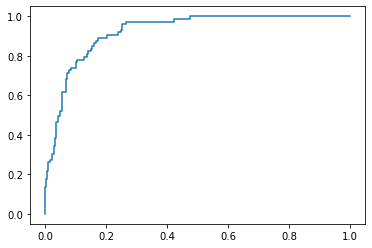

In [174]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)



In [177]:
import itertools

In [193]:
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}
        
'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [194]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.244633
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.245361
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.255576
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.412254
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.248742
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.244827
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.244744
         Iterations 9
Processed  6 models on 5 predictors in 0.020943403244018555
Selected predictors: ['G', 'OBP', 'RA', 'RS', 'SLG', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000001F571AA4148>
Total elapsed time: 0.02590322494506836 seconds.


IndexError: single positional indexer is out-of-bounds

이 오류를 해결하지 못했습니다.

In [195]:
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])

NameError: name 'Backward_best_model' is not defined

In [196]:
pred_Y_backward = cut_off(pred_y_backward,0.5)

NameError: name 'pred_y_backward' is not defined

In [197]:
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)

NameError: name 'pred_Y_backward' is not defined

In [198]:
print(acc(cfmat_backward))

NameError: name 'cfmat_backward' is not defined

In [199]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_backward, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

NameError: name 'pred_y_backward' is not defined

## 참고
- 통계 라이브러리에 특화(?)된 R에서는 회귀분석 모델 생성, 변수선택법, VIF 등 통계분석을 쉽게 수행할 수 있다.
- 위에서 수행했던 내용을 R로 실행한 내용입니다.
- [R vs Python 회귀분석모델](https://s3.ap-northeast-2.amazonaws.com/mjgim.assets/2.+Regression+in+R.html)